# ** <code style="background:blue;color:white">Walmart Sales Anaylysis & Prediction</code>**

# <b>Introducing Walmart</b>

Walmart Inc., founded by Sam Walton in 1962 and , headquartered in Arkansas,is an American multinational retail corporation that operates a chain of hypermarkets (also called supercenters), discount department stores, and grocery stores. 

As of October 31, 2022, Walmart has 10,586 stores in 24 countries. Walmart is the world's largest company by revenue, with about US$570 billion in annual revenue and the largest private employer in the world with 2.2 million employees. 

# <b>About Dataset</b>

The file has information about the Weekly Sales of 45 stores for the year 2010-2012 including the factors affectors affecting Sales such as Holidays, Temperature, Fuel Price, CPI, and Unemployment.

Within the Dataset file, following fields are present:
    <br>1. Store - the store number
    <br>2. Date - the week of sales
    <br>3. Weekly_Sales - sales for the given store
    <br>4. Holiday_Flag - whether the week is a holiday week 1 – Holiday week 0 – Non-holiday week
    <br>5. Temperature - Temperature on the day of sale
    <br>6. Fuel_Price - Cost of fuel in the region
    <br>7. CPI – Prevailing consumer price index
    <br>8. Unemployment - Prevailing unemployment rate

**Holiday Events in the Week**
    <br>Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12
    <br>Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12
    <br>Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12
    <br>Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12

# <b>Importing Libraries</b>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# For Plotting
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

/kaggle/input/walmart-sales-dataset-of-45stores/walmart-sales-dataset-of-45stores.csv


# <b>Understanding Data</b>

In [2]:
df = pd.read_csv('../input/walmart-sales-dataset-of-45stores/walmart-sales-dataset-of-45stores.csv')

In [3]:
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
df.shape

(6435, 8)

In [6]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [7]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [8]:
# Changing the Date datatype to datetime

from datetime import datetime
df['Date'] = pd.to_datetime(df['Date']);

df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [9]:
# Descriptive Statistics

df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [10]:
# Descriptive Statistics

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


In [11]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

# <b>Exploratory Data Analysis</b>

In [12]:
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day
df['MonthYear_value'] = df['Date'].dt.to_period('M')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,MonthYear_value
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2,2010-05
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,2010-12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,2010-02
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,2010-02
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3,2010-05


In [13]:
df.shape

(6435, 12)

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'Holiday_Flag'}>],
       [<AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'CPI'}>,
        <AxesSubplot:title={'center':'Fuel_Price'}>],
       [<AxesSubplot:title={'center':'Unemployment'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

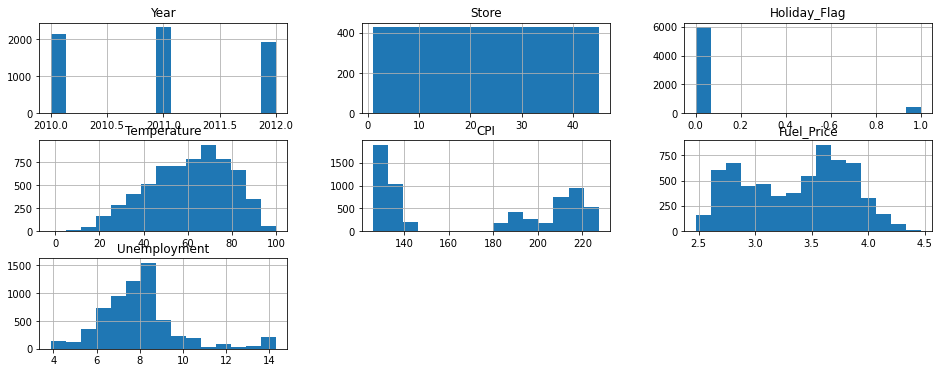

In [14]:
df[['Year', 'Store', 'Holiday_Flag','Temperature','CPI','Fuel_Price', 'Unemployment']].hist(
 bins=15, figsize=(16, 6))

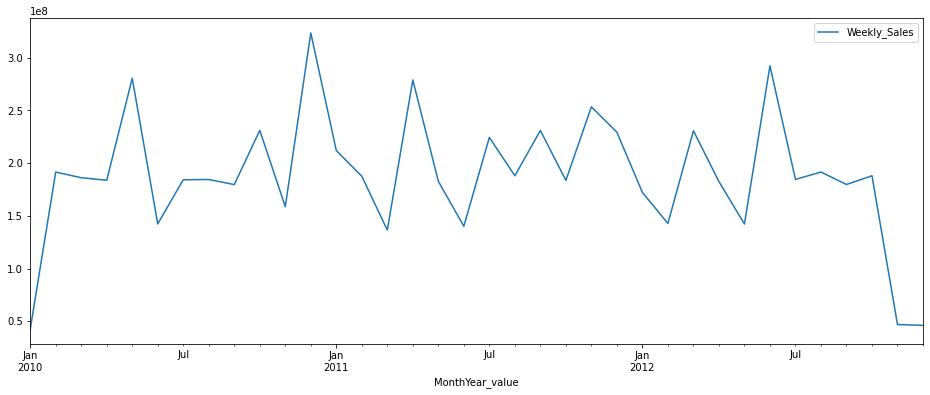

In [15]:
sales_year = df.groupby(['MonthYear_value']).sum()
sales_year[['Weekly_Sales']].plot(
 figsize=(16, 6), subplots=True);

Text(0.5, 1.0, 'Monthwise Sales')

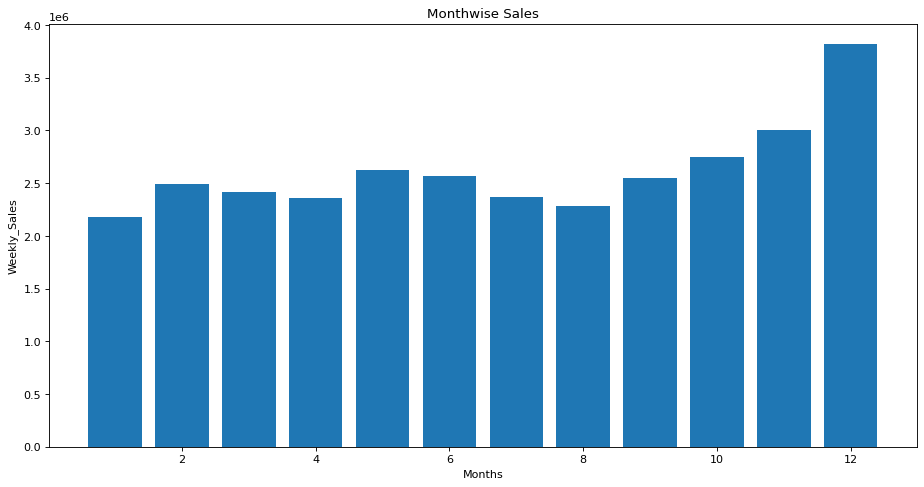

In [16]:
# Monthwise Sales

df['Day'] = pd.DatetimeIndex(df['Date']).day
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year




plt.figure(figsize=(14,7), dpi=80)
plt.bar(df['Month'], df['Weekly_Sales'])
plt.xlabel('Months')
plt.ylabel('Weekly_Sales')
plt.title('Monthwise Sales')

Text(0.5, 1.0, 'Yearly Sales')

<Figure size 800x560 with 0 Axes>

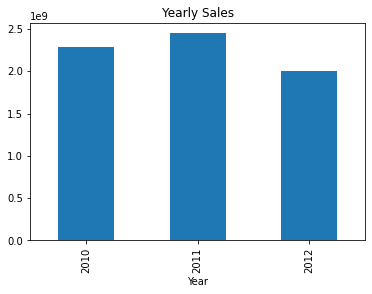

In [17]:
# Yearly Sales

plt.figure(figsize=(10,7), dpi=80)
df.groupby('Year')[['Weekly_Sales']].sum().plot(kind='bar', legend=False)
plt.title('Yearly Sales')

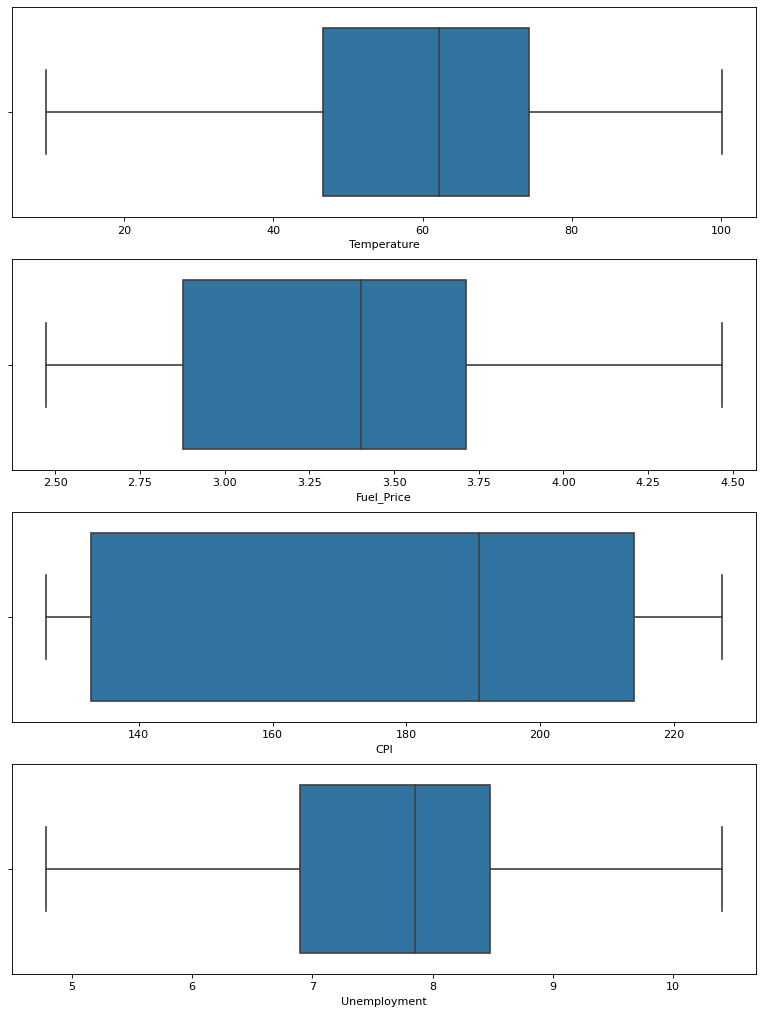

In [18]:
df = df[df['Unemployment'] <= 10.5]
df = df[df['Unemployment'] >= 4.7]
df = df[df['Temperature'] >= 8]



fig, axis = plt.subplots(4, figsize=(12,16), dpi=80)
x = df[['Temperature','Fuel_Price','CPI','Unemployment']]

for i, column in enumerate(x):
    sns.boxplot(df[column], ax=axis[i])

# <b>Model Building</b>

In [19]:
# Define Independent and dependent variable

x = df[['Store', 'Fuel_Price', 'CPI', 'Unemployment', 'Day', 'Month', 'Year']]
y = df['Weekly_Sales']


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# <b>Linear Regression</b>

* Linear Regression *

Train Accuracy Score: 12.316 %
Test Accuracy Score: 14.427000000000001 %
Mean Absolute Error: 431897.142
Mean Squared Error: 275418661409.513
Root Mean Squared Error: 524803.45


<AxesSubplot:xlabel='Weekly_Sales'>

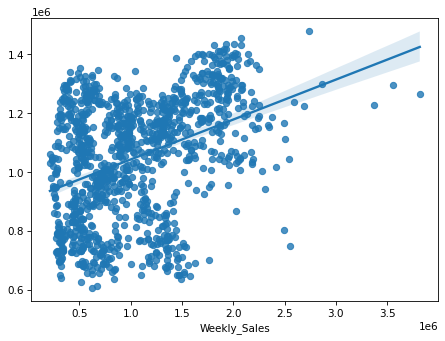

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(x_train, y_train)
lr_y_pred = lr.predict(x_test)

print('* Linear Regression *\n')

print('Train Accuracy Score:', lr.score(x_train, y_train).round(5)*100, '%')
print('Test Accuracy Score:', r2_score(y_test, lr_y_pred).round(5)*100, '%')

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lr_y_pred).round(3))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lr_y_pred).round(3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lr_y_pred)).round(3))

plt.figure(figsize=(7,5), dpi=75)
sns.regplot(y_test, lr_y_pred)

In [21]:
# Cross Validation of Linear Regression



from sklearn.model_selection import cross_val_score


# Linear Regression

lr_scores = cross_val_score(lr, x_train,y_train, cv=10, scoring='r2')
print(lr_scores)
print("Mean Score:", lr_scores.mean()*100,'%')

[0.11015095 0.11410546 0.11866153 0.07970809 0.1322775  0.10915598
 0.15702261 0.10269452 0.1330947  0.13475883]
Mean Score: 11.916301922610591 %


# <b>Random Forest Regressor</b>

* Random Forest Regressor *

Accuracy                 = 93.375 %
Mean Absolute Error      = 80335.22335
Mean Squared Error       = 21323774910.44586
Root Mean Squared Error  = 146026.62398


<AxesSubplot:xlabel='Weekly_Sales'>

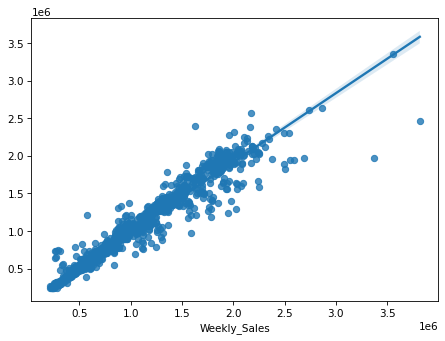

In [22]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

rfr_y_pred = rfr.predict(x_test)

R2_rfr = r2_score(y_test, rfr_y_pred)
mae = metrics.mean_absolute_error(y_test, rfr_y_pred)
mse = metrics.mean_squared_error(y_test, rfr_y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, rfr_y_pred))

print('* Random Forest Regressor *\n')

print('Accuracy                 =', R2_rfr.round(5)*100,'%')
print('Mean Absolute Error      =', mae.round(5))
print('Mean Squared Error       =', mse.round(5))
print('Root Mean Squared Error  =', rmse.round(5))

plt.figure(figsize=(7,5), dpi=75)
sns.regplot(y_test, rfr_y_pred)

In [23]:
# Cross Validation of Random Forest Regression


rfr_scores = cross_val_score(rfr, x_train,y_train, cv=10, scoring='r2')
print(rfr_scores)
print("Mean Score:", rfr_scores.mean()*100,'%')

[0.94182875 0.94795221 0.93744691 0.93974805 0.95080762 0.95744027
 0.9512066  0.94576162 0.93497019 0.93296461]
Mean Score: 94.4012682988436 %


# <b>Decission Tree Regressor</b>

* Decision Tree Regressor *

Accuracy                 = 88.67 %
Mean Absolute Error      = 102000.52052
Mean Squared Error       = 36465398895.8725
Root Mean Squared Error  = 190959.15505


<AxesSubplot:xlabel='Weekly_Sales'>

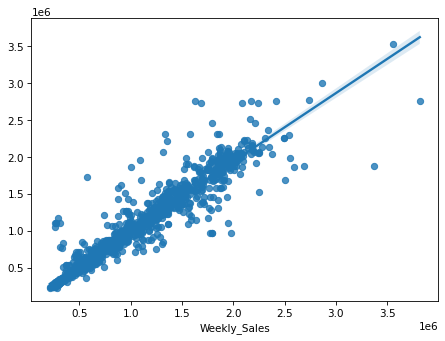

In [24]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

dtr_y_pred = dtr.predict(x_test)

R2_dtr = r2_score(y_test,dtr_y_pred)
mae = metrics.mean_absolute_error(y_test, dtr_y_pred)
mse = metrics.mean_squared_error(y_test, dtr_y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, dtr_y_pred))

print('* Decision Tree Regressor *\n')

print('Accuracy                 =', R2_dtr.round(5)*100,'%')
print('Mean Absolute Error      =', mae.round(5))
print('Mean Squared Error       =', mse.round(5))
print('Root Mean Squared Error  =', rmse.round(5))

plt.figure(figsize=(7,5), dpi=75)
sns.regplot(y_test, dtr_y_pred)

In [25]:
# Cross Validation of Decision Tree


dtr_scores = cross_val_score(dtr, x_train,y_train, cv=10, scoring='r2')
print(dtr_scores)
print("Mean Score:", dtr_scores.mean()*100,'%')

[0.883947   0.91756174 0.89172153 0.9017781  0.91568826 0.92289565
 0.9183948  0.93551455 0.91142054 0.90887308]
Mean Score: 91.07795261708544 %



Conclusion

Here, we have used 3 different algorithms to understand which model to use to predict the weekly sales. Linear Regression is not an appropriate model to use as accuracy is very low. However, Random Forest Regression gives accuracy of almost 95% . so, it is the best model to forecast weekly sales.
